In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [21]:
models = ['DetectNet','DNN', 'CNN', 'LSTM']
mods = ['BPSK', 'QPSK', '8PSK', 'PAM4', 'QAM16', 'QAM64', 'GFSK', 'CPFSK', ]
sample_length = [64,128,256,512,1024]

## Variando modulação

In [22]:
def plotResultsModel(model, sample_length, results, pf, mod_names):
    plt.figure(figsize=[12,6])
    for i in range(len(mod_names)):
        plt.plot(range(-20,20),results[i] , label=str(mod_names[i])+" pf= " + '{:.2f}%'.format(pf[i]))
    
    plt.title(str(model)+' ' +str(sample_length))
    plt.legend()
    plt.xlim([-20,20])
    plt.ylim([0.0, 1.1])
    plt.xlabel('SNR db')
    plt.ylabel('Pd %')
    plt.grid()
    plt.savefig('imagens/{:s}-{:d}.png'.format(model, sample_length))   
    plt.show()
   

DetectNet/1024/BPSKPds.xls
DetectNet/1024/QPSKPds.xls
DetectNet/1024/8PSKPds.xls
DetectNet/1024/PAM4Pds.xls
DetectNet/1024/QAM16Pds.xls
DetectNet/1024/QAM64Pds.xls
DetectNet/1024/GFSKPds.xls
DetectNet/1024/CPFSKPds.xls


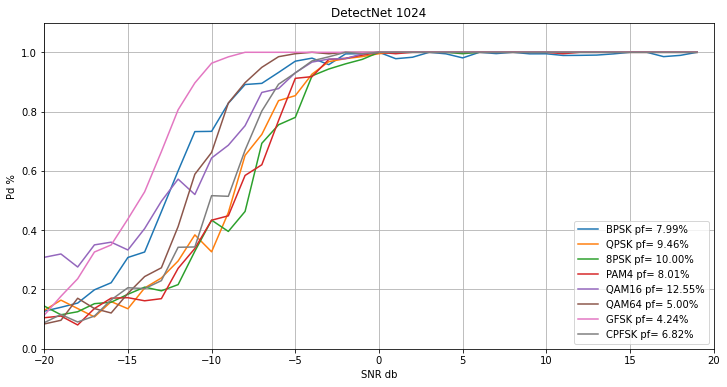

In [40]:
model = 'DetectNet'
_sample_length = 1024

results = []
pf = []
mod_names = []
for mod in mods:
    try:
        print(model+'/'+str(_sample_length)+'/'+mod+'Pds.xls')
        doc = pd.read_csv('result/xls/'+model+'/'+str(_sample_length)+'/'+mod+'Pds.xls', header=None)
        line = np.array(doc)
        results.append(line[0,range(40)])
        pf.append(line[0,40])
        mod_names.append(mod)
    except Exception as e:
        print("Nao encontrado")
        
plotResultsModel(model, _sample_length, results, pf, mod_names )

## Variando tamanho amostra

In [14]:
def plotResultsSample(model, mod, sample_length, results, pf, samples):
    plt.figure(figsize=[12,6])
    for i in range(len(samples)):
        plt.plot(range(-20,20),results[i], label=str(samples[i])+" pf= " + '{:.2f}%'.format(pf[i]) )
    
    plt.title(str(model)+' ' +str(mod))
    plt.legend()
    plt.xlim([-20,20])
    plt.ylim([0.0, 1.1])
    plt.xlabel('SNR db')
    plt.ylabel('Pd %')
    plt.grid()
    plt.savefig('imagens/{:s}-{:s}.png'.format(model, mod))
    plt.show()
    

DetectNet/64/GFSKPds.xls
DetectNet/128/GFSKPds.xls
DetectNet/256/GFSKPds.xls
DetectNet/512/GFSKPds.xls
DetectNet/1024/GFSKPds.xls


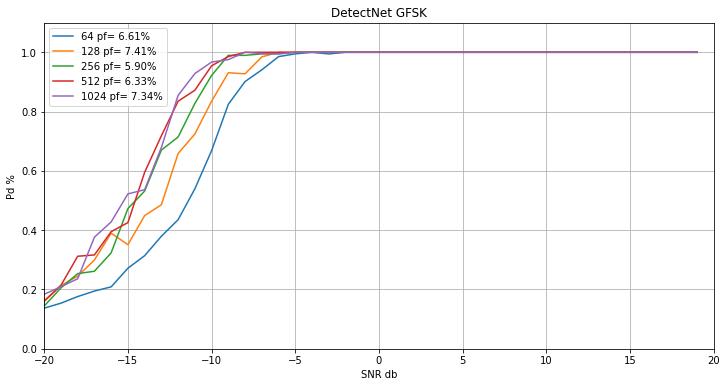

In [46]:
model = 'DetectNet'
mod = 'GFSK'

results = []
pf = []
samples = []
for _sample_length in sample_length:
    try:
        print(model+'/'+str(_sample_length)+'/'+mod+'Pds.xls')
        doc = pd.read_csv('result/xls/'+model+'/'+str(_sample_length)+'/'+mod+'Pds.xls', header=None)
        line = np.array(doc)
        results.append(line[0,range(40)])
        pf.append(line[0,40])
        
        samples.append(_sample_length)
    except Exception as e:
        print("Nao encontrado")
 
plotResultsSample(model, mod, _sample_length, results, pf, samples )

## Variando modelo

In [16]:
def plotResultsModel(mod, sample_length, results, pf, models):
    plt.figure(figsize=[12,6])
    for i in range(len(models)):
        plt.plot(range(-20,20),results[i], label=str(models[i])+" pf= " + '{:.2f}%'.format(pf[i]) )
    
    plt.title(str(mod)+' ' +str(sample_length))
    plt.legend()
    plt.xlim([-20,20])
    plt.ylim([0.0, 1.1])
    plt.xlabel('SNR db')
    plt.ylabel('Pd %')
    plt.grid()
    plt.savefig('imagens/{:s}-{:d}.png'.format(mod, sample_length))
    plt.show()
    

DetectNet/128/QAM16Pds.xls
DNN/128/QAM16Pds.xls
CNN/128/QAM16Pds.xls
LSTM/128/QAM16Pds.xls
SoftCombinationNet/128/QAM16Pds.xls


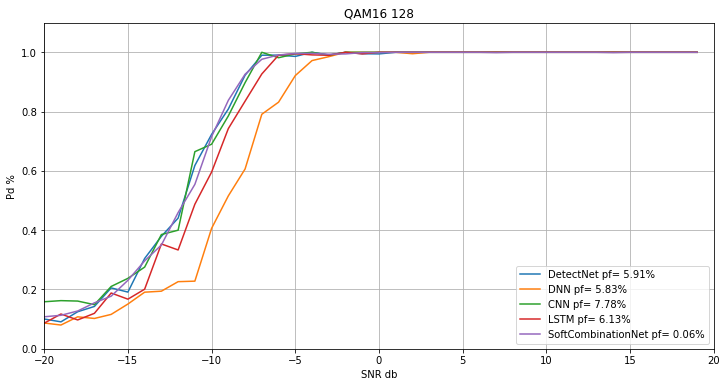

In [17]:
_sample_length = 128
mod = 'QAM16'

results = []
pf = []
_models = []
for model in models:
    try:
        print(model+'/'+str(_sample_length)+'/'+mod+'Pds.xls')
        doc = pd.read_csv('result/xls/'+model+'/'+str(_sample_length)+'/'+mod+'Pds.xls', header=None)
        line = np.array(doc)
        results.append(line[0,range(40)])
        pf.append(line[0,40])
        
        _models.append(model)
    except Exception as e:
        print("Nao encontrado")
        
plotResultsModel(mod, _sample_length, results, pf, _models )

## Cooperativo

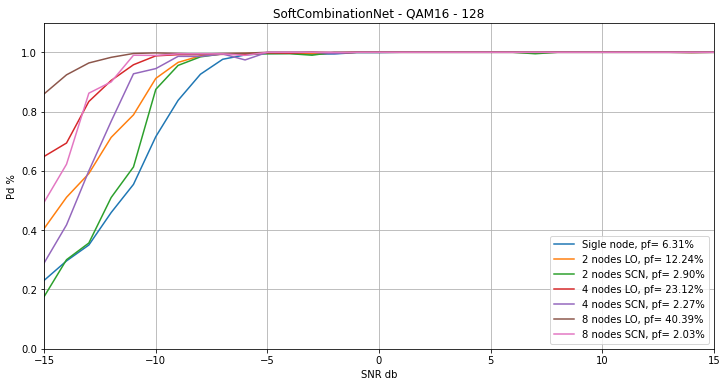

In [64]:
plt.figure(figsize=[12,6])

files = ['Pds', 'Pds_hard', 'Pds_soft', '_4Pds_hard', '_4Pds_soft' , '_8Pds_hard', '_8Pds_soft'  ]

doc = pd.read_csv('./result/xls/SoftCombinationNet/128/QAM16'+files[0]+'.xls', header=None)
line = np.array(doc)
result = line[0,range(40)]
pf = line[0,40]
plt.plot(range(-20,20), result , label="Sigle node, pf= " + '{:.2f}%'.format(pf*100))

doc = pd.read_csv('./result/xls/SoftCombinationNet/128/QAM16'+files[1]+'.xls', header=None)
line = np.array(doc)
result = line[0,range(40)]
pf = line[0,40]
plt.plot(range(-20,20), result , label="2 nodes LO, pf= " + '{:.2f}%'.format(pf*100))

doc = pd.read_csv('./result/xls/SoftCombinationNet/128/QAM16'+files[2]+'.xls', header=None)
line = np.array(doc)
result = line[0,range(40)]
pf = line[0,40]
plt.plot(range(-20,20), result , label="2 nodes SCN, pf= " + '{:.2f}%'.format(pf))

doc = pd.read_csv('./result/xls/SoftCombinationNet/128/QAM16'+files[3]+'.xls', header=None)
line = np.array(doc)
result = line[0,range(40)]
pf = line[0,40]
plt.plot(range(-20,20), result , label="4 nodes LO, pf= " + '{:.2f}%'.format(pf*100))

doc = pd.read_csv('./result/xls/SoftCombinationNet/128/QAM16'+files[4]+'.xls', header=None)
line = np.array(doc)
result = line[0,range(40)]
pf = line[0,40]
plt.plot(range(-20,20), result , label="4 nodes SCN, pf= " + '{:.2f}%'.format(pf))

doc = pd.read_csv('./result/xls/SoftCombinationNet/128/QAM16'+files[5]+'.xls', header=None)
line = np.array(doc)
result = line[0,range(40)]
pf = line[0,40]
plt.plot(range(-20,20), result , label="8 nodes LO, pf= " + '{:.2f}%'.format(pf*100))

doc = pd.read_csv('./result/xls/SoftCombinationNet/128/QAM16'+files[6]+'.xls', header=None)
line = np.array(doc)
result = line[0,range(40)]
pf = line[0,40]
plt.plot(range(-20,20), result , label="8 nodes SCN, pf= " + '{:.2f}%'.format(pf))

plt.title(str(model)+' - QAM16 - 128')
plt.legend()
plt.xlim([-15,15])
plt.ylim([0.0, 1.1])
plt.xlabel('SNR db')
plt.ylabel('Pd %')
plt.grid()
plt.savefig('imagens/{:s}-{:d}.png'.format(model, _sample_length))   
plt.show()
   